## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

             Age        Salary
count   8.000000      8.000000
mean   25.750000  40125.000000
std     2.815772   6534.250422
min    22.000000  30000.000000
25%    23.750000  36500.000000
50%    25.500000  39000.000000
75%    27.500000  45250.000000
max    30.000000  50000.000000


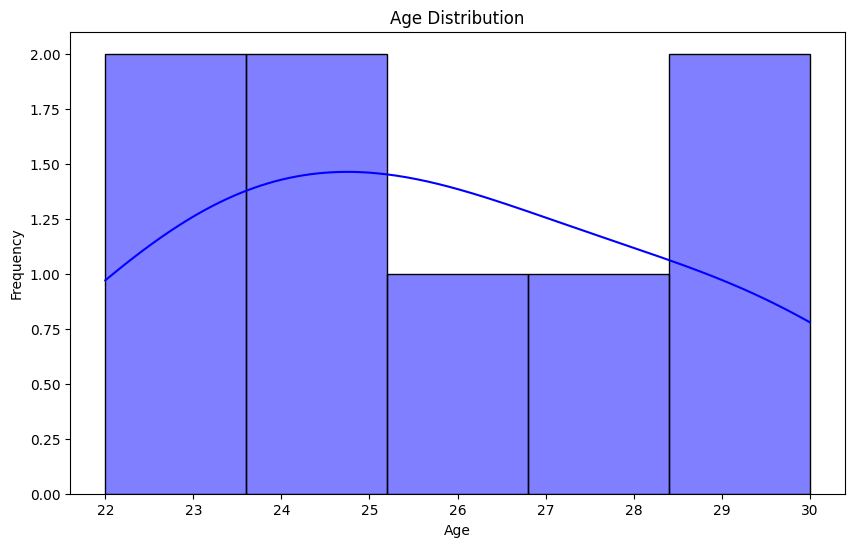

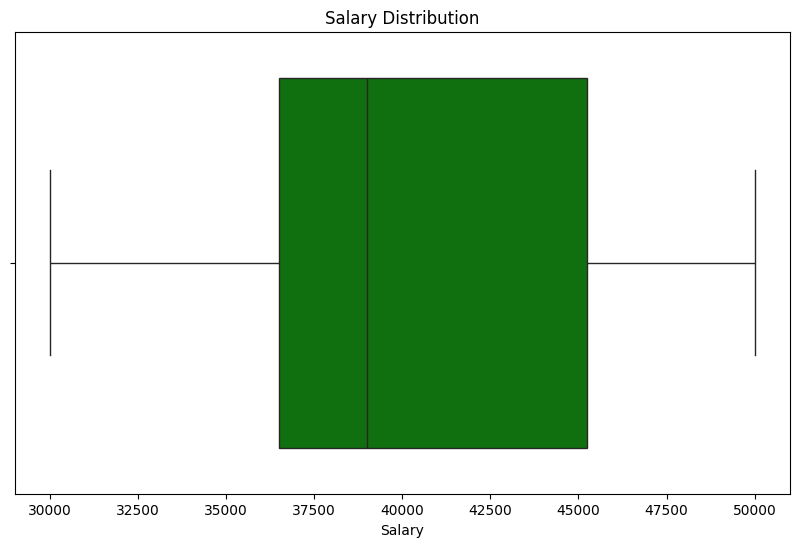

Null values per column:
Age       2
Salary    2
dtype: int64


In [1]:
# Task 1: Summary Statistics

import pandas as pd

# Sample dataset
data = {
    'Age': [22, 25, 29, 24, 23, 27, 26, 30],
    'Salary': [30000, 35000, 40000, 38000, 37000, 45000, 46000, 50000]
}

df = pd.DataFrame(data)

# Summary statistics
summary_stats = df.describe()

print(summary_stats)





# Task 2: Visualize Data Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    'Age': [22, 25, 29, 24, 23, 27, 26, 30],
    'Salary': [30000, 35000, 40000, 38000, 37000, 45000, 46000, 50000]
}

df = pd.DataFrame(data)

# Plotting histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=5, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting boxplot for Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Salary'], color='green')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()




# Task 3: Checking for Null Values

import pandas as pd

# Sample dataset with missing values
data = {
    'Age': [22, 25, None, 24, 23, None, 26, 30],
    'Salary': [30000, None, 40000, 38000, None, 45000, 46000, 50000]
}

df = pd.DataFrame(data)

# Check for null values
null_values = df.isnull().sum()

print("Null values per column:")
print(null_values)



## Handle Missing & Inconsistent Data Before Applying ML Models

In [2]:
# Task 4: Drop Missing Values
import pandas as pd

# Sample dataset with missing values
data = {
    'Age': [22, 25, None, 24, 23, None, 26, 30],
    'Salary': [30000, None, 40000, 38000, None, 45000, 46000, 50000]
}

df = pd.DataFrame(data)

# Drop rows with any missing values
df_dropped_rows = df.dropna()

# Drop columns with any missing values
df_dropped_columns = df.dropna(axis=1)

print("Data after dropping rows with missing values:")
print(df_dropped_rows)

print("\nData after dropping columns with missing values:")
print(df_dropped_columns)





# Task 5: Fill Missing Values

import pandas as pd

# Sample dataset with missing values
data = {
    'Age': [22, 25, None, 24, 23, None, 26, 30],
    'Salary': [30000, None, 40000, 38000, None, 45000, 46000, 50000]
}

df = pd.DataFrame(data)

# Fill missing values with the mean of the column
df_filled_mean = df.fillna(df.mean())

# Fill missing values with a specific constant (e.g., 0 for Age)
df_filled_constant = df.fillna({'Age': 0, 'Salary': 35000})

print("Data after filling missing values with mean:")
print(df_filled_mean)

print("\nData after filling missing values with constants:")
print(df_filled_constant)



# Task 6: Handling Outliers with Capping

import pandas as pd
import numpy as np

# Sample dataset with outliers
data = {
    'Age': [22, 25, 29, 24, 23, 27, 26, 1000],  # Outlier (1000)
    'Salary': [30000, 35000, 40000, 38000, 37000, 45000, 46000, 1200000]  # Outlier (1200000)
}

df = pd.DataFrame(data)

# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Cap outliers
    df[column] = np.clip(df[column], lower_limit, upper_limit)

# Cap outliers for Age and Salary
cap_outliers(df, 'Age')
cap_outliers(df, 'Salary')

print("Data after handling outliers with capping:")
print(df)




Data after dropping rows with missing values:
    Age   Salary
0  22.0  30000.0
3  24.0  38000.0
6  26.0  46000.0
7  30.0  50000.0

Data after dropping columns with missing values:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7]
Data after filling missing values with mean:
    Age   Salary
0  22.0  30000.0
1  25.0  41500.0
2  25.0  40000.0
3  24.0  38000.0
4  23.0  41500.0
5  25.0  45000.0
6  26.0  46000.0
7  30.0  50000.0

Data after filling missing values with constants:
    Age   Salary
0  22.0  30000.0
1  25.0  35000.0
2   0.0  40000.0
3  24.0  38000.0
4  23.0  35000.0
5   0.0  45000.0
6  26.0  46000.0
7  30.0  50000.0
Data after handling outliers with capping:
      Age  Salary
0  22.000   30000
1  25.000   35000
2  29.000   40000
3  24.000   38000
4  23.000   37000
5  27.000   45000
6  26.000   46000
7  33.125   58375


## Choose the Right Scaling Method

In [ ]:
# Task 7: Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample dataset
data = {
    'Age': [22, 25, 30, 24, 28],
    'Salary': [30000, 35000, 40000, 38000, 45000]
}

df = pd.DataFrame(data)

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to the dataset
df_min_max_scaled = min_max_scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
df_min_max_scaled = pd.DataFrame(df_min_max_scaled, columns=df.columns)

print("Min-Max Scaled Data:")
print(df_min_max_scaled)






# Task 8: Robust Scaling

from sklearn.preprocessing import RobustScaler
import pandas as pd

# Sample dataset
data = {
    'Age': [22, 25, 30, 24, 28],
    'Salary': [30000, 35000, 40000, 38000, 45000]
}

df = pd.DataFrame(data)

# Initialize RobustScaler
robust_scaler = RobustScaler()

# Apply Robust scaling to the dataset
df_robust_scaled = robust_scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=df.columns)

print("Robust Scaled Data:")
print(df_robust_scaled)





# Task 9: MaxAbs Scaling

from sklearn.preprocessing import MaxAbsScaler
import pandas as pd

# Sample dataset
data = {
    'Age': [22, 25, 30, 24, 28],
    'Salary': [30000, 35000, 40000, 38000, 45000]
}

df = pd.DataFrame(data)
max_abs_scaler = MaxAbsScaler()
df_max_abs_scaled = max_abs_scaler.fit_transform(df)
df_max_abs_scaled = pd.DataFrame(df_max_abs_scaled, columns=df.columns)

print("MaxAbs Scaled Data:")
print(df_max_abs_scaled)

Min-Max Scaled Data:
     Age    Salary
0  0.000  0.000000
1  0.375  0.333333
2  1.000  0.666667
3  0.250  0.533333
4  0.750  1.000000
Robust Scaled Data:
    Age  Salary
0 -0.75    -1.6
1  0.00    -0.6
2  1.25     0.4
3 -0.25     0.0
4  0.75     1.4
MaxAbs Scaled Data:
        Age    Salary
0  0.733333  0.666667
1  0.833333  0.777778
2  1.000000  0.888889
3  0.800000  0.844444
4  0.933333  1.000000


## Keep Track of Data Transformations for Reproducibility

In [ ]:

import logging
import pandas as pd
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', filename='data_preprocessing.log', filemode='w')
data = {
    'Age': [22, 25, None, 24, 23, None, 26, 30],
    'Salary': [30000, None, 40000, 38000, None, 45000, 46000, 50000]
}

df = pd.DataFrame(data)
logging.info("Initial data:")
logging.info(df)
df_filled = df.fillna(df.mean())
logging.info("Filled missing values with the mean of each column.")
logging.info(df_filled)

# Example of dropping rows with missing values
df_dropped = df.dropna()
logging.info("Dropped rows with missing values.")
logging.info(df_dropped)





# Task 11: Store Transformation Parameters
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Sample dataset
data = {
    'Age': [22, 25, 30, 24, 28],
    'Salary': [30000, 35000, 40000, 38000, 45000]
}

df = pd.DataFrame(data)

# Example of scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Save the scaler transformation parameters
with open('scaler_params.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Transformation parameters stored in 'scaler_params.pkl'.")

# To load the parameters later:
with open('scaler_params.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Transform new data with loaded scaler
new_data = pd.DataFrame({'Age': [27, 29], 'Salary': [42000, 47000]})
new_data_scaled = loaded_scaler.transform(new_data)
print("Scaled new data using loaded transformation parameters:")
print(new_data_scaled)






Transformation parameters stored in 'scaler_params.pkl'.
Scaled new data using loaded transformation parameters:
[[0.42008403 0.87929684]
 [1.12022407 1.8784978 ]]
